In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

df_sec = web.get_data_yahoo("005930.KS", start, end)
df_kospi = web.get_data_yahoo('^KS11', start, end)
df_sec

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12955.746094
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13163.930664
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13468.208984
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13019.805664
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13147.918945
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,70792.843750
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,74528.867188
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,75391.015625


In [3]:
df_kospi["ln_diff"] = (np.log(df_kospi["Close"]) - np.log(df_kospi["Close"]).shift(1))*100
df_sec["ln_diff"] = (np.log(df_sec["Close"]) - np.log(df_sec["Close"]).shift(1))*100

In [4]:
df_sec

,High,Low,Open,Close,Volume,Adj Close,ln_diff
Date,,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12955.746094,NaN
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13163.930664,1.594148
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13468.208984,2.285126
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13019.805664,-3.386055
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13147.918945,0.979200
...,...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,70792.843750,2.188870
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,74528.867188,5.142860
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,75391.015625,1.150172


In [5]:
import statsmodels.api as sm


In [20]:
SE = df_sec.iloc[1:1000, 6]
KOSPI = df_kospi.iloc[1:1000, 6]

In [21]:
SE.isnull()

Date
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
2010-01-11    False
              ...  
2014-01-03    False
2014-01-06    False
2014-01-07    False
2014-01-08    False
2014-01-09    False
Name: ln_diff, Length: 999, dtype: bool

In [22]:
SE.shape

(999,)

In [23]:
SE.describe()

count    999.000000
mean       0.045536
std        1.825820
min       -7.743174
25%       -1.069824
50%        0.000000
75%        1.102520
max        6.739797
Name: ln_diff, dtype: float64

In [24]:
print("삼성변화율:" ,SE.describe() , " \n 코스피변화율:" , KOSPI.describe())

삼성변화율: count    999.000000
mean       0.045536
std        1.825820
min       -7.743174
25%       -1.069824
50%        0.000000
75%        1.102520
max        6.739797
Name: ln_diff, dtype: float64  
 코스피변화율: count    999.000000
mean       0.013371
std        1.146222
min       -6.420246
25%       -0.552635
50%        0.021698
75%        0.669270
max        4.900019
Name: ln_diff, dtype: float64


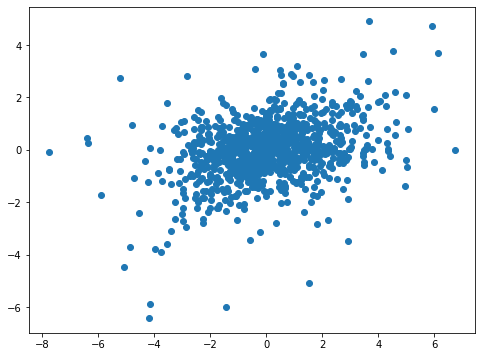

In [25]:

plt.figure(figsize  = (8,6))
plt.scatter(SE, KOSPI)
plt.show()

In [26]:
SE_value = df_sec.iloc[1:1000, 6].values
KOSPI_value = df_kospi.iloc[1:1000, 6].values

model = sm.OLS(KOSPI_value, SE_value).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              132.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    6.52e-29
Time:                        15:28:02   Log-Likelihood:                         -1491.1
No. Observations:                 999   AIC:                                      2984.
Df Residuals:                     998   BIC:                                      2989.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2150      0.019     11.519      0.000       0.178       0.252
==============================================================================
Omnibus:                      109.973   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.139
Skew:                          -0.465   Prob(JB):                     7.93e-93
Kurtosis:                       6.054   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model = sm.OLS(SE_value , KOSPI_value).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              132.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    6.52e-29
Time:                        15:28:15   Log-Likelihood:                         -1956.4
No. Observations:                 999   AIC:                                      3915.
Df Residuals:                     998   BIC:                                      3920.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5458      0.047     11.519      0.000       0.453       0.639
==============================================================================
Omnibus:                       26.987   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.552
Skew:                           0.051   Prob(JB):                     1.17e-13
Kurtosis:                       4.192   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
SE_CLOSE = df_sec.iloc[1:1000, 3]
KOSPI_CLOSE= df_kospi.iloc[1:1000, 3]

In [29]:
mean_se = SE_CLOSE.mean()
mean_ko = KOSPI_CLOSE.mean()

In [30]:
SE_CLOSE = SE_CLOSE.fillna(mean_se)
KOSPI_CLOSE = KOSPI_CLOSE.fillna(mean_ko)

In [31]:
print("삼성종가:" ,SE_CLOSE.describe() , " \n 코스피종가:" , KOSPI_CLOSE.describe())

삼성종가: count      999.000000
mean     21953.053053
std       5404.691366
min      13600.000000
25%      16660.000000
50%      21160.000000
75%      26800.000000
max      31520.000000
Name: Close, dtype: float64  
 코스피종가: count     999.000000
mean     1910.054693
std       133.962250
min      1552.790039
25%      1826.325012
50%      1927.680054
75%      2001.434998
max      2228.959961
Name: Close, dtype: float64


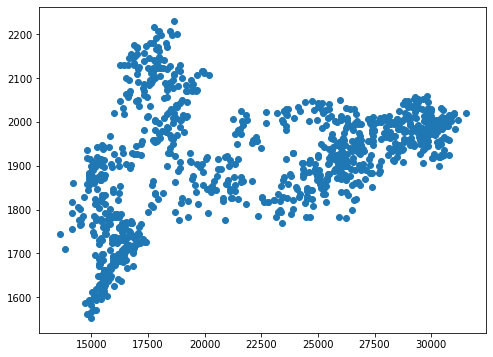

In [32]:
plt.figure(figsize  = (8,6))
plt.scatter(SE_CLOSE, KOSPI_CLOSE)
plt.show()

In [36]:
SE_CLOSE_value = df_sec.iloc[1:1000, 3].values
KOSPI_CLOSE_value= df_kospi.iloc[1:1000, 3].values
model = sm.OLS(KOSPI_CLOSE_value, SE_CLOSE_value).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          1.947e+04
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:29:31   Log-Likelihood:                         -7458.4
No. Observations:                 999   AIC:                                  1.492e+04
Df Residuals:                     998   BIC:                                  1.492e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0826      0.001    139.533      0.000       0.081       0.084
==============================================================================
Omnibus:                     8161.171   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.564
Skew:                          -0.074   Prob(JB):                     2.16e-20
Kurtosis:                       1.532   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 랜던자료로 정규성 검증

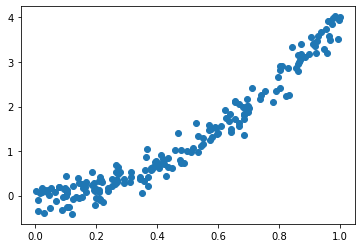

In [38]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1234567)
x = np.random.rand(200)
y = (x * 2) ** 2 + 0.2 * np.random.randn(200)
plt.figure()
plt.scatter(x,y)
plt.show()


In [39]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# 하나의 data frame으로 병합
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
df.columns=['X','Y']
# 회귀분석 수행
mdl = sm.ols(formula='Y~X', data=df)
# 회귀분석 결과에서 잔차만 추출
resid = mdl.fit().resid


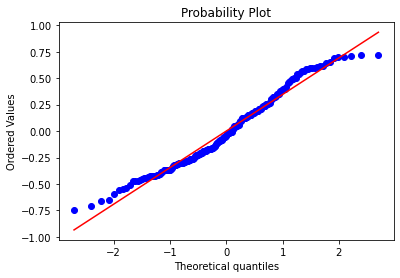

In [40]:
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()


In [41]:
# sharpiro 검정을 수행 결과
from scipy import stats
stats.shapiro(resid)


ShapiroResult(statistic=0.9733986854553223, pvalue=0.0007582974503748119)

In [ ]:
#첫번째 값은 검정통계량
#두번째 값은 p-value
#sharpiro 검정의 경우 귀무가설이 정규분포를 따른다는 것
# p-value가 0.05보다 작으므로 귀무가설을 기각, 즉 데이터는 정규성을 만족한다고 볼 수 없다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy.matlib
from math import sqrt

def norm(A):
    return sqrt(A[0]**2+A[1]**2)

# Residual을 계산하기위한 행렬의 repeatcopy
def repeatCopy(arg,size):
    t1 = [arg[0]]*size
    t2 = [arg[1]]*size
    result = [t1,t2]
    return np.array(result)

# return index
def findin(arg,threshold):
    result = []
    for i in range(len(arg)):
        if abs(arg[i]) <= threshold:
            result.append(i)
    return result

def ransac_demo(data,thrheshold_dist,inlier_ratio,num,loop_const):
    bestInNum = 0
    while bestInNum == 0:
        bestParameter1,bestParameter2 = 0.0,0.0
        bestInlier_list = []
        for i in range(len(data)*loop_const):
            # 랜덤으로 점을 2개 선택합니다.
            idx = random.sample(range(num),2)
            sample = [[data[0][idx[0]],data[1][idx[0]]],[data[0][idx[1]],data[1][idx[1]]]]

            # 선택한 2개의 점으로 직선을 구합니다.
            kLine = np.subtract(sample[0],sample[1])
            klineNorm = kLine / norm(kLine)
            normVector = np.array([-klineNorm[1],klineNorm[0]])

            # sample과 data의 residual을 구합니다.
            sub_mat = np.subtract(data,repeatCopy(sample[0],num))
            distance = np.dot(normVector,sub_mat)
            # distance is 1-D vector

            # residual의 inlier threshold로 inlier 판단
            inlier_idx = findin(distance,thrheshold_dist)
            inlier_num = len(inlier_idx)

            # inlier의 최대값일 경우 값을 저장합니다.
            if inlier_num >= inlier_ratio * num and inlier_num > bestInNum:
                tmp_list = [[],[]]
                for j in inlier_idx:
                    tmp_list[0].append(data[0][j])
                    tmp_list[1].append(data[1][j])
                bestInlier_list = tmp_list.copy()
                bestInNum = inlier_num

                # 이예제의 경우 parameter는 직선을 이루는 2개의 상수입니다.
                p1 = (sample[1][1] - sample[0][1])/(sample[1][0] - sample[0][0])
                p2 = sample[0][1] - p1*sample[0][0]
                bestParameter1,bestParameter2 = p1,p2
    return bestParameter1,bestParameter2,bestInlier_list

def sample_line(x):
    return x + 3

if __name__ == "__main__":
    sample_n = 100
    noise_ratio = 2
    sample_data = [[],[]]
    for i in range(sample_n):
        if i % 2 == 0:
            sample_data[0].append(random.random()*sample_n)
            sample_data[1].append(random.random()*sample_n)
        else:
            sample_data[0].append(i+float(random.sample([-1,1],1)[0])*random.random()*noise_ratio)
            sample_data[1].append(sample_line(i+float(random.sample([-1,1],1)[0])*random.random()*noise_ratio) + float(random.sample([-1,1],1)[0])*random.random()*noise_ratio)
    
    p1,p2,inlier = ransac_demo(sample_data,1,0.1,sample_n,1)
    ransac_result_x = np.array(list(range(0,100,1)))
    true_result_y = sample_line(ransac_result_x)
    ransac_result_y = np.multiply(ransac_result_x,p1) + p2
    # plt.scatter(inlier[0],inlier[1],c='red',s=5,label='inlier')
    plt.scatter(sample_data[0],sample_data[1],s=5,label='data')
    plt.plot(ransac_result_x,ransac_result_y,label='estimation line loop const')
    plt.plot(ransac_result_x,true_result_y,c='green',label='truth line',linewidth=3)
    plt.legend()
    plt.grid()
    plt.show()
    pass

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy.matlib
from math import sqrt

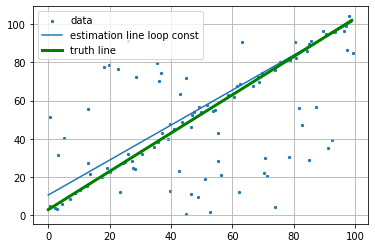

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import random
import numpy.matlib
from math import sqrt

def norm(A):
    return sqrt(A[0]**2+A[1]**2)

# Residual을 계산하기위한 행렬의 repeatcopy
def repeatCopy(arg,size):
    t1 = [arg[0]]*size
    t2 = [arg[1]]*size
    result = [t1,t2]
    return np.array(result)

# return index
def findin(arg,threshold):
    result = []
    for i in range(len(arg)):
        if abs(arg[i]) <= threshold:
            result.append(i)
    return result

def ransac_demo(data,thrheshold_dist,inlier_ratio,num,loop_const):
    bestInNum = 0
    while bestInNum == 0:
        bestParameter1,bestParameter2 = 0.0,0.0
        bestInlier_list = []
        for i in range(len(data)*loop_const):
            # 랜덤으로 점을 2개 선택합니다.
            idx = random.sample(range(num),2)
            sample = [[data[0][idx[0]],data[1][idx[0]]],[data[0][idx[1]],data[1][idx[1]]]]

            # 선택한 2개의 점으로 직선을 구합니다.
            kLine = np.subtract(sample[0],sample[1])
            klineNorm = kLine / norm(kLine)
            normVector = np.array([-klineNorm[1],klineNorm[0]])

            # sample과 data의 residual을 구합니다.
            sub_mat = np.subtract(data,repeatCopy(sample[0],num))
            distance = np.dot(normVector,sub_mat)
            # distance is 1-D vector

            # residual의 inlier threshold로 inlier 판단
            inlier_idx = findin(distance,thrheshold_dist)
            inlier_num = len(inlier_idx)

            # inlier의 최대값일 경우 값을 저장합니다.
            if inlier_num >= inlier_ratio * num and inlier_num > bestInNum:
                tmp_list = [[],[]]
                for j in inlier_idx:
                    tmp_list[0].append(data[0][j])
                    tmp_list[1].append(data[1][j])
                bestInlier_list = tmp_list.copy()
                bestInNum = inlier_num

                # 이예제의 경우 parameter는 직선을 이루는 2개의 상수입니다.
                p1 = (sample[1][1] - sample[0][1])/(sample[1][0] - sample[0][0])
                p2 = sample[0][1] - p1*sample[0][0]
                bestParameter1,bestParameter2 = p1,p2
    return bestParameter1,bestParameter2,bestInlier_list

def sample_line(x):
    return x + 3

if __name__ == "__main__":
    sample_n = 100
    noise_ratio = 2
    sample_data = [[],[]]
    for i in range(sample_n):
        if i % 2 == 0:
            sample_data[0].append(random.random()*sample_n)
            sample_data[1].append(random.random()*sample_n)
        else:
            sample_data[0].append(i+float(random.sample([-1,1],1)[0])*random.random()*noise_ratio)
            sample_data[1].append(sample_line(i+float(random.sample([-1,1],1)[0])*random.random()*noise_ratio) + float(random.sample([-1,1],1)[0])*random.random()*noise_ratio)
    
    p1,p2,inlier = ransac_demo(sample_data,1,0.1,sample_n,1)
    ransac_result_x = np.array(list(range(0,100,1)))
    true_result_y = sample_line(ransac_result_x)
    ransac_result_y = np.multiply(ransac_result_x,p1) + p2
    # plt.scatter(inlier[0],inlier[1],c='red',s=5,label='inlier')
    plt.scatter(sample_data[0],sample_data[1],s=5,label='data')
    plt.plot(ransac_result_x,ransac_result_y,label='estimation line loop const')
    plt.plot(ransac_result_x,true_result_y,c='green',label='truth line',linewidth=3)
    plt.legend()
    plt.grid()
    plt.show()
    pass



Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


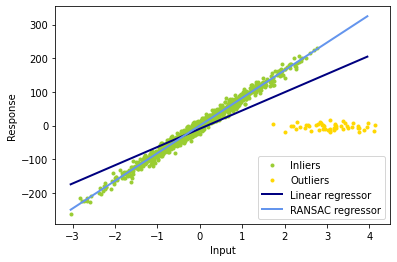

In [9]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()